In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random

In [2]:
df = pd.read_csv(r"C:\Users\Scott\Documents\ccm\ML\Project1\winequality-comb.csv")

In [3]:
df.describe()
#1,599 reds indicated by a 1 in wine color feature. 4,898 white incicated by a 0 in wine color feature

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
list(df)

['wine_color',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
#Fix the data types
df["wine_color"] = df["wine_color"].apply(lambda x: int(x))
df["fixed acidity"] = df["fixed acidity"].apply(lambda x: float(x))
df["volatile acidity"] = df["volatile acidity"].apply(lambda x: float(x))
df["citric acid"] = df["citric acid"].apply(lambda x: float(x))
df["residual sugar"] = df["residual sugar"].apply(lambda x: float(x))
df["chlorides"] = df["chlorides"].apply(lambda x: float(x))
df["free sulfur dioxide"] = df["free sulfur dioxide"].apply(lambda x: float(x))
df["total sulfur dioxide"] = df["total sulfur dioxide"].apply(lambda x: float(x))
df["density"] = df["density"].apply(lambda x: float(x))
df["pH"] = df["pH"].apply(lambda x: float(x))
df["sulphates"] = df["sulphates"].apply(lambda x: float(x))
df["alcohol"] = df["alcohol"].apply(lambda x: float(x))
df["quality"] = df["quality"].apply(lambda x: float(x))

In [6]:
df.head()

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [7]:
df.corr()[["wine_color"]]

,wine_color
wine_color,1.000000
fixed acidity,0.486740
volatile acidity,0.653036
citric acid,-0.187397
residual sugar,-0.348821
chlorides,0.512678
free sulfur dioxide,-0.471644
total sulfur dioxide,-0.700357
density,0.390645
pH,0.329129


<Figure size 432x288 with 0 Axes>

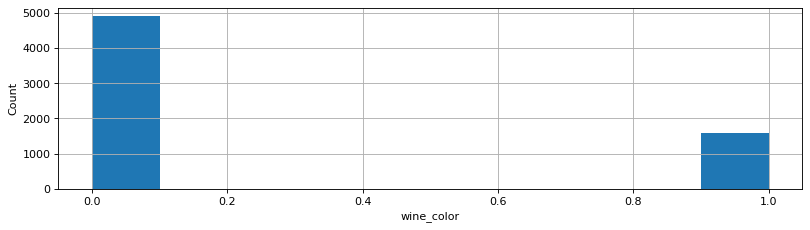

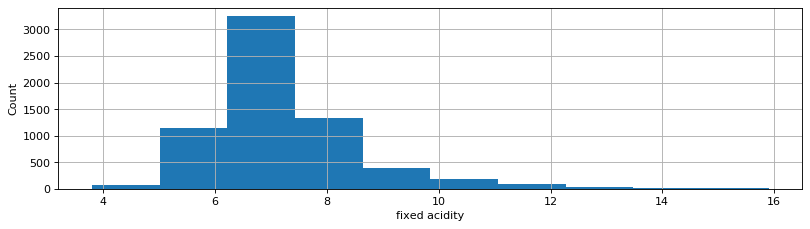

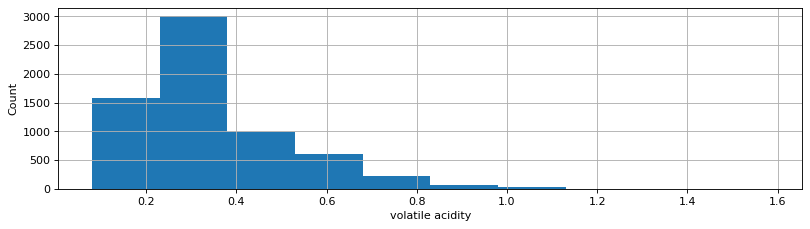

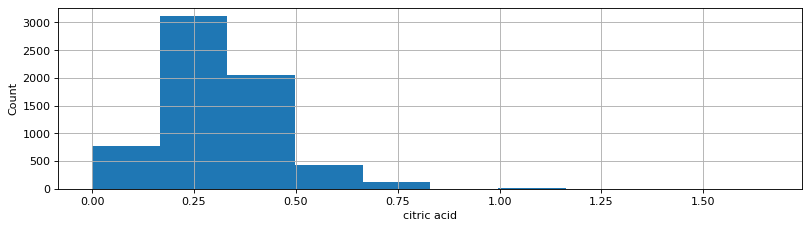

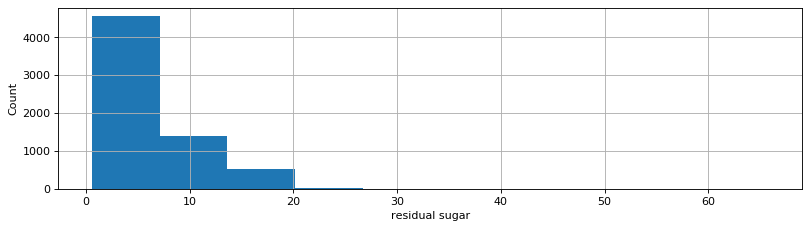

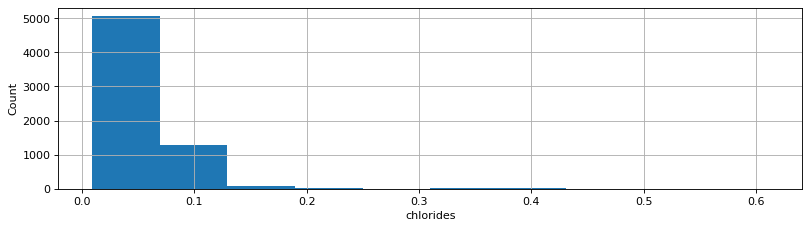

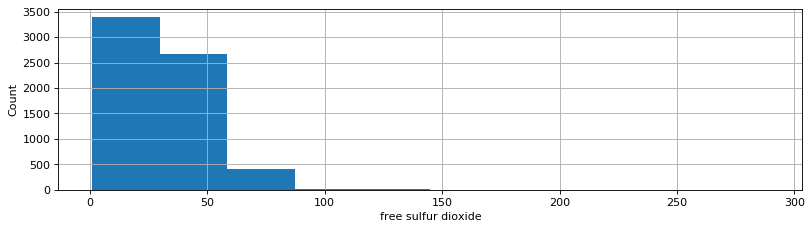

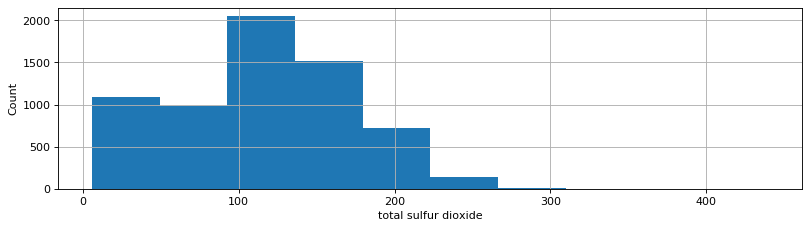

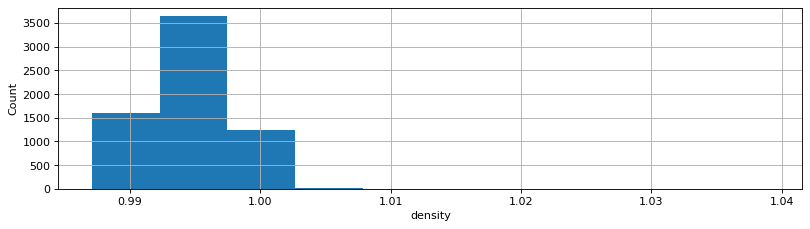

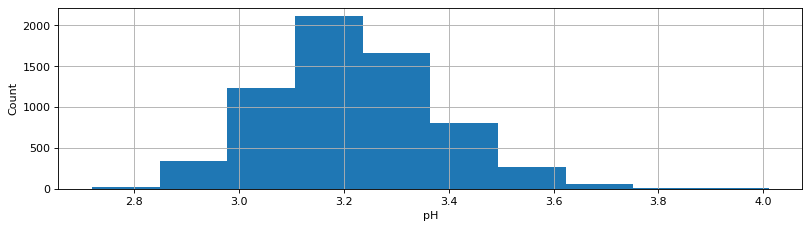

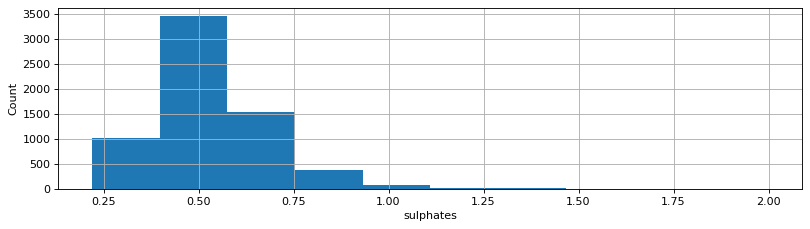

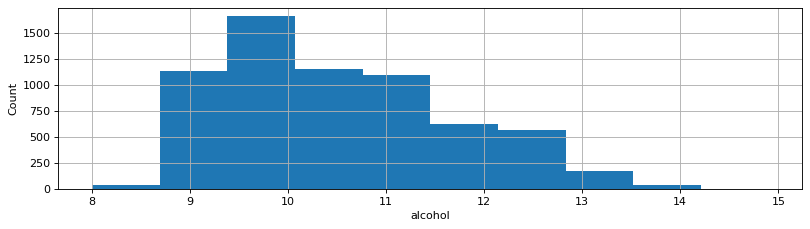

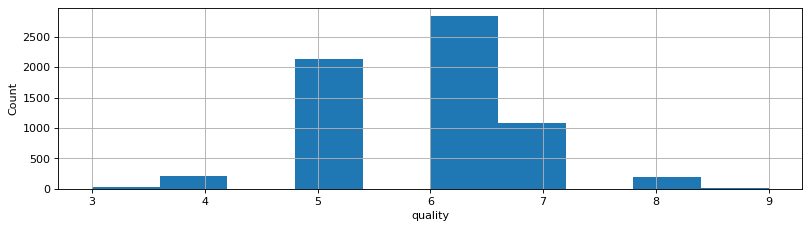

In [8]:
#plot histograms of features
plt.clf()
for var in list(df.columns):
    plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Count')
    plt.xlabel(var)
    

    df[var].hist(bins=10)
    plt.show()

In [9]:
#Review correlation matrix
df.corr()

,wine_color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_color,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


In [10]:
#shuffle the data
df = shuffle(df).reset_index(drop=True)

In [11]:
# use min max scaler and fit_transform for, then put that result back into a dataframe
scaled = MinMaxScaler().fit_transform(df[['wine_color','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                                          'pH', 'sulphates','alcohol', 'quality']])
df_scaled = pd.DataFrame(scaled, columns = ['wine_color','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                                          'pH', 'sulphates','alcohol','quality' ])

# Set X and y values
X = df_scaled[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality']]
y = df['wine_color']

In [12]:
lenTrain, lenVal = 5000, 1000

In [13]:
# Split the training and testing data

X_train, X_val, X_test = X[:lenTrain], X[lenTrain:(lenTrain+lenVal)], X[(lenTrain+lenVal):]
y_train, y_val, y_test = y[:lenTrain], y[lenTrain:(lenTrain+lenVal)], y[(lenTrain+lenVal):]
print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)
print (X_test.shape, y_test.shape)
#y_val.to_csv('y_val.csv')
#y_train.to_csv('y_train.csv')
#y_test.to_csv('y_test.csv')
#X_val.to_csv('X_val.csv')
#X_train.to_csv('X_train.csv')
#X_test.to_csv('X_test.csv')

(5000, 12) (5000,)
(1000, 12) (1000,)
(497, 12) (497,)


In [14]:
# create initial classifiers
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)


In [15]:
# KNN
gridKNN = GridSearchCV(
    estimator=knn, param_grid={'n_neighbors': [3, 5,7, 10, 15, 30], "weights": ["distance", "uniform"]}, 
    scoring="precision", cv=5
)
gridKNN.fit(X_train, y_train)
print (gridKNN.best_estimator_)
print (gridKNN.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
0.9845170090944108


In [16]:
# Tree
gridTree = GridSearchCV(
    estimator=tree, param_grid={'max_depth': [None, 5, 10]}, 
    scoring="precision", cv=5
)
gridTree.fit(X_train, y_train)
print (gridTree.best_estimator_)
print (gridTree.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
0.9703288508958545


In [17]:
# SVC
gridSVC = GridSearchCV(
    estimator=svm, param_grid={'C': [0.5,1,2]}, 
    scoring="precision", cv=5
)
gridSVC.fit(X_train, y_train)
print (gridSVC.best_estimator_)
print (gridSVC.best_score_)

C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
0.9860959849495028


C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
#  Random Forest
gridRF = GridSearchCV(
    estimator=rf, param_grid={"n_estimators": [3, 5, 7, 10, 12, 15, 20, 30], 'max_depth': [None, 5, 10]}, 
    scoring="precision", cv=5
)
gridRF.fit(X_train, y_train)
print (gridRF.best_estimator_)
print (gridRF.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.9975439839390227


In [19]:
#  Adaboost Regressor
adaParams = {"base_estimator":[
    None, 
    DecisionTreeClassifier(max_depth=5)
], "n_estimators":[5, 10, 30, 50, 60], "learning_rate":[.5, 1.0, 1.5], "algorithm":["SAMME.R"]}
gridAda = GridSearchCV(
    estimator=ada, param_grid=adaParams,
    scoring="precision", cv=5
)
gridAda.fit(X_train, y_train)
print (gridAda.best_estimator_)
print (gridAda.best_score_)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [20]:
#Paramenters from grid Search
svm1 = SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)


randfor = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

ada = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.5, n_estimators=60, random_state=42)

In [21]:
#Use test dataset

svm1.fit(X_train, y_train)
y_svm1 =svm1.predict(X_test)
print ("svm1 score from Grid Search: ",gridSVC.best_score_ )
print ("svm1 precision_score:        ",precision_score(y_test, y_svm1))
print ("svm1 recall_score:           ",recall_score(y_test, y_svm1))
print ("svm1 f1_score:               ",f1_score(y_test, y_svm1))
print("")

randfor.fit(X_train, y_train)
y_randfor = randfor.predict(X_test)
print ("randfor score from Grid Search: ", gridRF.best_score_ )
print ("randfor precision_score:        ",precision_score(y_test, y_randfor))
print ("randfor recall_score:           ",recall_score(y_test, y_randfor))
print ("randfor f1_score:               ",f1_score(y_test, y_randfor))
print("")

ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
print ("ada score from Grid Search: ",gridAda.best_score_ )
print ("ada precision_score:        ",precision_score(y_test, y_ada))
print ("ada recall_score:           ",recall_score(y_test, y_ada))
print ("ada f1_score:               ",f1_score(y_test, y_ada))


C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm1 score from Grid Search:  0.9860959849495028
svm1 precision_score:         0.990990990990991
svm1 recall_score:            0.9401709401709402
svm1 f1_score:                0.9649122807017545

randfor score from Grid Search:  0.9975439839390227
randfor precision_score:         0.991304347826087
randfor recall_score:            0.9743589743589743
randfor f1_score:                0.9827586206896551

ada score from Grid Search:  0.993440836367065
ada precision_score:         0.9912280701754386
ada recall_score:            0.9658119658119658
ada f1_score:                0.9783549783549784


All the precision scores quite high - the algorithm as few false positives (e.g. few occurrences of predicting white when in fact it is a red or predicting red when in fact it is white.)  The recall scores are also high indicating that red is predicted when in fact it is red and white is predicted when in fact it is white.  This indicates the algorithms are working well in classifying the wine between red and white as indicated by the high F1 score.